---

# Artificial Intelligence - COMPSCI4004/5087 2019-2020
<small><small><small>v2019-2020a</small></small></small>

## Lab Week 3: Sensing and acting - in a computer vision context

------

**Aim**: In this exercise we'll see how an agent can use image processing to estimate aspect of the enviroment such as edges, agent location and location of other objects.

**Objectives:**
- use basic computer vision to estimate the environmetn and state of an AI agent.
- use histograms and thresholding for carrying out basic pre-processing
- gain a deeper understanding of convolution and correlation; for filterig and template matching

**Guide**: The notebook contains specific tasks you'll need to carry out to make the notebook run. These are indicated with:

* <font color=dark-magenta>TASK:</font> This is a task for you to carry out before proceeding. 
* <font color=green>CHECKPOINTS:</font> This indicates a key point you should understand before proceeding. If you're in doubt then ask then consult the lab assistants.
* A basic model solution (marked with <font color=red>SOLUTION</font>) will be provided a week after the Lab session.

----

### Q3.1 Pre-requisites
Before running the lab make sure you have the required libraries installed on your machine.

- <font color=dark-magenta>TASK:</font> If you can run the cell below without errors you should be fine to proceed.

In [2]:
import numpy as np
import skimage,skimage.io #, scipy.ndimage, scipy.interpolate, scipy.signal
import gym # not need for the first part
import scipy

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

print(skimage.__version__)
print(np.__version__)
print(scipy.__version__)
print(mpl.__version__)

0.15.0
1.16.4
1.3.0
3.1.1


If any of the above requirements are not present (i.e. you see en error) you should be able to install them on the Lab machines using (you may need to use slightly different install commands on your own computer):
- skimage 
 - It can be installed on the lab machines using: `pip install --user scikit-image` from an Anaconda prompt.
- Open AI Gym (see the lab from last week)
 - It can be installe don the lab machines using: `pip install --user gym[atari]` from an Anaconda prompt.

---

### Q3.2: Loading an image

In this part we will look to load images into Python and inspect them.

#### Q3.2.1 Loading an image, plotting it and inspecting the pixel values

- <font color=dark-magenta>TASK:</font> Load the image `./resources/kodim23.png` using the skimage function `skimage.io.imread` and inspect the shape and content of the tensor. What's the maxium intensity value of the pixels? What's the minimum values of the pixels values?

In [40]:
#insert your code here
img = skimage.io.imread("./resources/kodim23.png")

print(np.max(img[:, :, 0]), np.min(img[:, :, 0]))
print(np.max(img[:, :, 1]), np.min(img[:, :, 1]))
print(np.max(img[:, :, 2]), np.min(img[:, :, 2]))
print(img.shape)

255 0
255 0
255 0
(512, 768, 3)


- <font color=dark-magenta>TASK:</font> Plot the image using the helper function below

In [4]:
def show_image(x, title=None):
    plt.figure()
    plt.imshow(x, cmap='gray', interpolation='nearest')
    plt.axis('off')
    if title:
        plt.title(title)

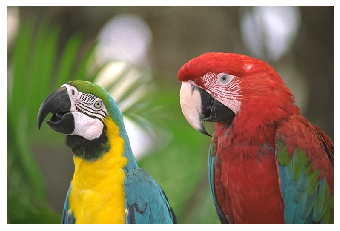

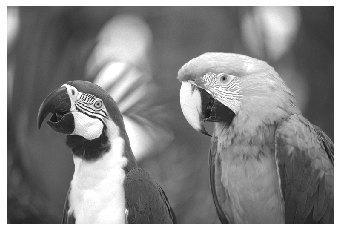

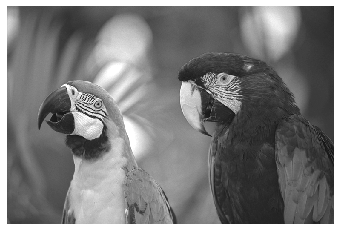

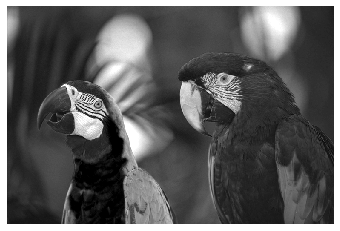

In [42]:
#insert your code here
show_image(img)
show_image(img[:, :, 0])
show_image(img[:, :, 1])
show_image(img[:, :, 2])

- <font color=dark-magenta>TASK:</font> Plot the values (i.e. the intensity) of the individual color channels using the helper functin below. Does the visualizaiton align with your understanding of the channels and pixel values (you may need to look up a RGB table)?

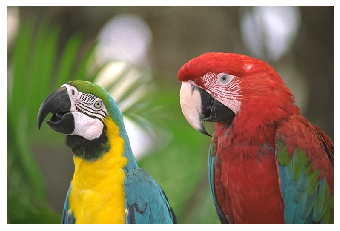

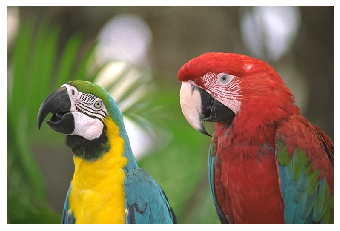

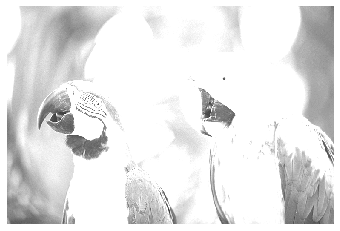

In [63]:
def show_image_gray(x, title=None, vmax=255, axis='Off'):
    plt.figure()        
    plt.imshow(x, cmap='gray', interpolation='nearest', vmin=0, vmax=vmax)
    plt.axis(axis)
    if title:
        plt.title(title)
        
show_image_gray(img, vmax=255)
show_image_gray(img, vmax=12)
show_image_gray(img[:, :, 0], vmax=100)

---

### Q3.3: Basic analysis and pre-processing

#### Q3.3.1 Histogram

- <font color=dark-magenta>TASK:</font> Plot a historgram of the pixel values in each of the three channels (red green blue). Hint: You may want to consult the lecture notes or matlibplot's [hist documentation](https://matplotlib.org/3.1.1/gallery/statistics/hist.html)

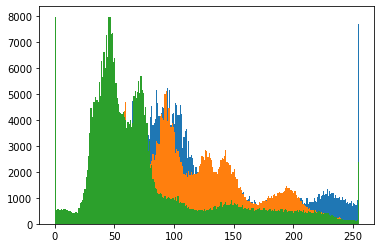

In [81]:
plt.hist(img[:, :, 0].flatten(), bins = 255) 
plt.hist(img[:, :, 1].flatten(), bins = 255) 
plt.hist(img[:, :, 2].flatten(), bins = 255) 
plt.show()

---

---

### Q3.4: Convolution and filtering

Mathematically speaking we call the process of taking weighted sums of neighbouring values **convolution**. Convolution is denoted with a $*$: $f * g$ is the convolution of $f$ and $g$ ($\otimes$ is sometimes used in other texts). We won't deal with convolution of continuous functions, but the convolution of two vectors or matrices is written the same way:
$$y[n] = \left( {x * h} \right)[n] = \sum\limits_{k =  - \infty }^\infty  {x[k] \cdot h[n - k]}  = \sum\limits_{k =  - \infty }^\infty  {x[n - k] \cdot h[k]} $$

You may want to read a bit more about convolution before proceeding e.g. on [wikipeadia](https://en.wikipedia.org/wiki/Convolution).


----

#### Q3.4.1
- <font color=dark-magenta>TASK:</font> Inspect the equations above and compute (pen and paper) the result for the follwing signal
$$x = [1,2,3,4]$$
$$h = [1/2,1,1/2]$$
 Note: in Python we assume the vectors are **zero-indexed** such that the first element as index 0 and that values not specified are zero, e.g. $x[-2]=0$, $x[-1]=0$, $x[4]=0$ and $h[3]=0$ etc, i.e. in practice we do not need to loop indefinitely as suggested by the sums and can effectiley do $y[n] = \sum\limits_{k = 0}^{k=2}  {x[n - k] \cdot h[k]}$ for all $n$ where $x[n-k]$ is defined.

#### Q3.4.2
- <font color=dark-magenta>TASK:</font> Repeat the computation with $h=[1, 0, 0]$ and $h=[1/2, 1/2, 1/2]$. What is so special about these kernels ? Hint: one of them is a moving average filter. The other does nothing to the input x.

#### Q3.4.3
- <font color=dark-magenta>TASK:</font> Implement a custom convolution funciton in Python using only basic operations, like loops, add, multiply (inner products are also fine); you can't use any inbuild convolution operators. You can test you implementation vs numpy's convolution (`np.convolve` ; [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html))

In [106]:
# Insert code here
x = [1,2,3,4]
h = [1/2,1,1/2]

def padding(x, h):
    for i in range(len(h)-1):
        x.insert(0, 0)
        x.append(0)
    return x

def convolution(x, h):
    res = []
    x = padding(x, h)
    for i in range(0, len(x)-2):
        tmp = 0
        for j in range(len(h)):
            tmp += x[i+j] * h[j]
        res.append(tmp)
    return res
print(convolution(x, h))

np.convolve([1,2,3,4], [1/2,1,1/2])

[0.5, 2.0, 4.0, 6.0, 5.5, 2.0]


array([0.5, 2. , 4. , 6. , 5.5, 2. ])

---

#### Q3.4.4 2D Convolution

Images are two 2D arrays and we can define a 2D convolution operator as follows

$$y[n,m] = \left( {x * h} \right)[n,m] = \sum\limits_{k =  - \infty }^\infty  {\sum\limits_{l =  - \infty }^\infty  {x[n,m] \cdot h[n - k,m - l]} }  = \sum\limits_{k =  - \infty }^\infty  {\sum\limits_{l =  - \infty }^\infty  {x[n - k,m - l] \cdot h[k,l]} } $$

- <font color=dark-magenta>TASK:</font> Inspect the equational above and notice the similarity with the 1D version. We are still taking taking weighted sums (defined by the kernel, h) of neighbouring values but this time over two dimensions. A good illustration of the principle (notetation is slightly different, can be found [here](http://www.songho.ca/dsp/convolution/convolution2d_example.html)).


- <font color=dark-magenta>TASK:</font> Inspect the documentation for the `scipy.signal.convolve2d` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html). This function conveniently computes the 2d convolution for you. 


- <font color=dark-magenta>TASK:</font> Compute the the 2D convolution of the follwing to matrixes using the `scipy.signal.convolve2d` function/toolbox(keen students migth want to expand their own 1D implementation). Note: you may want to set mode='same' to ensure that the output has the same size has the orginal image.

In [264]:
h = np.matrix('0.1 0.2 0.3; -0.1 -0.2 0.7; 0.1 0.1 -0.2') # this is our kernel
x = np.matrix('0.1 0.2 0.3 0.4; -0.1 0.7 -0.2 0.8; 0.3 0.7 -0.5 0.8; 0.0 -0.1 0.3 -0.5') # this is our "image"

print("The filter kernel:\n%s\n" % h)

print("The image:\n%s\n" % x)

The filter kernel:
[[ 0.1  0.2  0.3]
 [-0.1 -0.2  0.7]
 [ 0.1  0.1 -0.2]]

The image:
[[ 0.1  0.2  0.3  0.4]
 [-0.1  0.7 -0.2  0.8]
 [ 0.3  0.7 -0.5  0.8]
 [ 0.  -0.1  0.3 -0.5]]



In [265]:
#insert your code here

* <font color=dark-magenta>TASK:</font>: Try to change the coefficients in the filter kernel, h. Specifically, observe what happends when:

In [267]:
h = np.matrix('0 0 0; 0 1 0; 0 0 0') # this is our kernel
x = np.matrix('0.1 0.2 0.3 0.4; -0.1 0.7 -0.2 0.8; 0.3 0.7 -0.5 0.8; 0.0 -0.1 0.3 -0.5') # this is our "image"


----

### Q3.5: Image Filtering


In this part, we will see how the convolution operator can be used in practice to filter images to enhance or suppress certain aspects. You can use your implementation of the convolution/filtering operation or the one provided in `scipy.signal.convolve2d`.

---


#### Q3.5.1 Low-pass filtering (blurring)

- <font color=dark-magenta>TASK:</font> Implement code to carry out low-pass filtering/blurring on the image `./resource/kodim22.png`) using the following filter kernel. Note: `skimage.color.rgb2gray` can convert your image into gray scale easily.

In [268]:
h = np.array([[0.25, 0.5, 0.25], [0.5, 1.0, 0.5], [0.25, 0.5, 0.25]])
h = h/np.sum(h) # normalise to sum=1
print(h)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [269]:
#

- <font color=dark-magenta>TASK:</font> Discuss applications of low-pass filtering (e.g. by consulting other sources of information).

---

#### Q3.5.2 High-pass

- <font color=dark-magenta>TASK:</font> High pass filtering can be achived by first low pass filtering and then subtrating the result from the orginal image. Implement such and approach and validate the result by visualizing the image.

In [248]:
# insert your code here

- <font color=dark-magenta>TASK:</font> List and discuss at least two applicaiton of high pass filtering?
    

---

#### Q3.5.3 Edge detection

Convolution can also be used to detect edges. A simple approach is to use a socalled Sobel filters (see lecture notes or https://en.wikipedia.org/wiki/Sobel_operator). A Sobel kernel is given below (one vertical and one horizontal) :

In [253]:
sobel_v = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
sobel_h = sobel_v.T

- <font color=dark-magenta>TASK: </font> Visualize these kernel as images. Carry out Sobel filtering on the `./resource/kodim22.png` image. Hint you need to do and then combine the two results. Discuss the quality of the result - does it match your notion of edges. 

In [254]:
# Insert your solution here

---

### Q3.6: Template matching via correlation

A very common task in signal/image processing is measuring the similarity between two signals or images. For this we can use a simple correlation (which you can read more about [here](https://en.wikipedia.org/wiki/Cross-correlation) ) defined as:


$${R_{xy}}[i] = \sum\limits_{n =  - \infty }^\infty  {x[n] \cdot y[n +i]},$$

where i is an integer offset. The convolution informed us of the effect of one signal on the other, but correlation tells us how similar they are if we shift it by $i$. We can use this to measure the distance between two signals.


In [260]:
x = np.array([1,2,3,0.4, -1, 0 , -2]) # out signal
y = np.array([2.1,2.9]) # our template
R = np.correlate(x,y)
print("R[i]=%s" % R)

R[i]=[ 7.9  12.9   7.46 -2.06 -2.1  -5.8 ]


This tells us that the template, y, matches best the signal/image at location i=1 (i.e. shifting one to the right). This gives us the location of the match and the similarity.

We can generalise this to 2D (i.e. images). Fortunately, scikit-image already comes with an implementation of this principle in the `skimage.feature.match_template` [module](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html) (see also the lecture notes). Note: The match conveniently uses convolution to compute correlation (keen students might be interested in investigating this connection further).

---

#### Q3.6.1 Implementing image template matching using convolution

- <font color=dark-magenta>TASK:</font> 
Implement a simple algorithm for template matching usign `skimage.feature.match_template`
 - 1) Load the image `resources/kodim15.png` and visualize it
 - 2) Load the mask `resources/kodim_mask.png` and visualize it
 - 3) Use `skimage.feature.match_template` to compute the the (normalized) correlation (a matrix)
 - 4) Find the image position corresponding to the maxium correlation between the mask and the image.
 - 4) Visualize the orginal image with an box indicating where you have identified the template


In [261]:
# Insert your code here

- <font color=dark-magenta>TASK:</font> Discuss the quality of the matching (is it good, bad)? 


- <font color=dark-magenta>TASK:</font> Define a new mask (e.g. the girl's left eye), save as an image, and see if you can detect both here eyes which this method? Does it work? 


- <font color=dark-magenta>TASK:</font>The main caveat here is that the mask comes from the same image as the original. Do you think this method works in general (e.g., what if the mask came from this image girl, but you tried it on an image of yourself)?

---
### Q3.7: Template matching in the Open AI Gym [open-ended]

- <font color=dark-magenta>TASK:</font> We encourage you to experiment with template matching in the Open AI Gym environment (e.g. MS Pacman). Observe the state of the environment as an image, define a suitable mask for detecting the location of the agent and other interesting objects. Conduct small evaluating whether your able to robustly identify the various objects as the agent moves around.

---